<a href="https://colab.research.google.com/github/project-ida/arpa-e-experiments/blob/main/tutorials/working-with-sem-eds-data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="https://nbviewer.org/github/project-ida/arpa-e-experiments/blob/main/tutorials/working-with-sem-eds-data.ipynb" target="_parent"><img src="https://nbviewer.org/static/img/nav_logo.svg" alt="Open In nbviewer" width="100"/></a>

# Working with ESM/EDS numpy data 

We are working with people at Texas Tech to characterise any morphological and elemental changes that take place as part of the our experiments. This involves using a scanning electron microscope to generate pictures of the material surface (so called SEM data) and also energy-dispersive X-ray spectroscopy (EDS) to analyze elemental composition.

The data is exported from [Oxford Instruments Aztec software](https://nano.oxinst.com/products/aztec/) into a HDF5 like format called [h5iona](https://github.com/oinanoanalysis/h5oina) that's stored in Google Drive, (e.g. [this folder](https://drive.google.com/drive/folders/1WqbhoVJ5d6HWgWa1Bo3wYWzeZD6t-ia5)). This compressed data format is a pain to work with in python, so we've converted it into numpy arrays which are also stored in Google Drive (see e.g. [this folder](https://drive.google.com/drive/folders/1Zp6a3h2Es3q3eercQlK0gMA57-sqfoSo)).

The data conversion is performed using `sem-eds-convert-h5iona-files.py` which can be found in the [libs](../libs/) folder of this repository.

In [ ]:
# RUN THIS IF YOU ARE USING GOOGLE COLAB
# It pulls the arpa-e repo into colab and makes sure we can import heplers from it
# It also changes the working directory to the arpa-e folder so we can load media easier

import sys
import os
!git clone https://github.com/project-ida/arpa-e-experiments.git
sys.path.insert(0,'/content/arpa-e-experiments')
os.chdir('/content/arpa-e-experiments')

In [1]:
# RUN THIS IF YOU ARE LOCAL. 
# It makes sure we can import helpers from libs which is one level up

import sys
import os

# Get the parent directory (one level up from the current directory)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the parent directory to sys.path
sys.path.insert(0, project_root)

In [13]:
import gdown
import numpy as np
import matplotlib.pyplot as plt
from libs.sem_eds_helpers import *

## Loading the metadata for a specific site

Inside [20241023 jonah 4 / Project 1 / pythondata](https://drive.google.com/drive/folders/1WqbhoVJ5d6HWgWa1Bo3wYWzeZD6t-ia5), we can  grab the share link for the metadata associated with site 11 - this is called `Project 1 Specimen 1 Area 1 Site 11 Map Data 10_metadata.txt`

We're using `gdown` to download the data. We wrote a separate tutorial about it [here](working-with-google-drive.ipynb).

In [4]:
metadata_path = gdown.download("https://drive.google.com/file/d/1rmpqlh43s9DXWxK6xJ0LNWYZxcTkl-ai/view?usp=drive_link", fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1rmpqlh43s9DXWxK6xJ0LNWYZxcTkl-ai
To: /Users/matt/Documents/GitHub/arpa-e-experiments/tutorials/Project 1 Specimen 1 Area 1 Site 11 Map Data 10_metadata.txt
100%|█████████████████████████████████████████████████████████████████████████████████████████████| 649/649 [00:00<00:00, 3.62MB/s]


You should now be able to find a file with the name given below:

In [7]:
print(metadata_path)

Project 1 Specimen 1 Area 1 Site 11 Map Data 10_metadata.txt


Let's now use one of our helpers to read in the metadata associated with the SEM and EDS data.

In [8]:
metadata = load_metadata(metadata_path)

In [9]:
# Print the loaded metadata
for key, value in metadata.items():
    print(f"{key}: {value}")

/1/Electron Image/Header/X Cells: 1024
/1/Electron Image/Header/Y Cells: 768
/1/Electron Image/Header/X Step: 0.5490099191665649
/1/Electron Image/Header/Y Step: 0.5490099191665649
/1/EDS/Header/X Cells: 1024
/1/EDS/Header/Y Cells: 768
/1/EDS/Header/X Step: 0.5490099191665649
/1/EDS/Header/Y Step: 0.5490099191665649
/1/EDS/Header/Start Channel: -197.48275756835938
/1/EDS/Header/Channel Width: 9.998198509216309
/1/EDS/Header/Energy Range: 20.0
/1/EDS/Header/Number Channels: 2048
/1/EDS/Header/Stage Position/X: 47.31108856201172
/1/EDS/Header/Stage Position/Y: 44.875999450683594
/1/EDS/Header/Stage Position/Z: 30.27899932861328


## Visualising a SEM image for a specific site

Now, let's grab the share link for the SEM data associated with site 11.

In [10]:
sem_npz_path = gdown.download("https://drive.google.com/file/d/1rfAbFPRk9zwM1QNOacsbXBfGL40pjdb6/view?usp=drive_link", fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1rfAbFPRk9zwM1QNOacsbXBfGL40pjdb6
To: /Users/matt/Documents/GitHub/arpa-e-experiments/tutorials/Project 1 Specimen 1 Area 1 Site 11 Map Data 10_sem.npz
100%|█████████████████████████████████████████████████████████████████████████████████████████| 1.42M/1.42M [00:00<00:00, 3.51MB/s]


You should now be able to find a file with the name given below:

In [11]:
print(sem_npz_path)

Project 1 Specimen 1 Area 1 Site 11 Map Data 10_sem.npz


Because the data is in numpy format, we can use `np.load` to bring the data into python.

In [17]:
# Load the .npz file
data = np.load(sem_npz_path)
data

NpzFile 'Project 1 Specimen 1 Area 1 Site 11 Map Data 10_sem.npz' with keys: sem_data

The data is stored as a kind of dictionary. We can pull out the raw data like this:

In [18]:
sem_image_array = data['sem_data']

As you can see below, it's just a normal numpy array.

In [19]:
sem_image_array

array([[32383, 31830, 31121, ..., 31854, 29117, 28881],
       [30880, 31420, 30941, ..., 29952, 29441, 29330],
       [32462, 29811, 32525, ..., 29379, 31052, 30996],
       ...,
       [23363, 23195, 25072, ..., 21362, 20476, 24905],
       [27015, 24629, 27066, ..., 24712, 23132, 22281],
       [23577, 28010, 27996, ..., 21807, 23087, 16825]],
      shape=(768, 1024), dtype=int16)

Let's visualise the data:

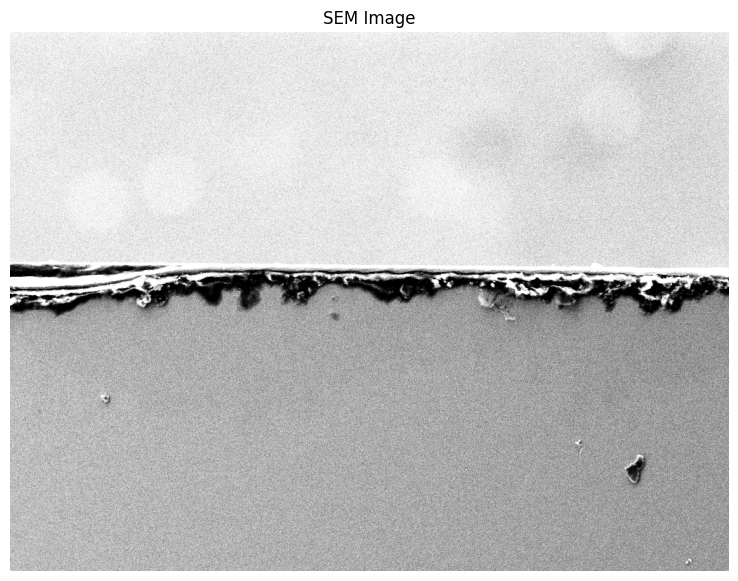

In [21]:
# Plot the SEM image
plt.figure(figsize=(10, 7))  # Adjust the figure size as needed
plt.imshow(sem_image_array, cmap='gray')  # Use a grayscale colormap
plt.title("SEM Image")
plt.axis('off')  # Hide the axes for better visualization
plt.show()

## Visualising an EDS image for a specific site

We're going to follow similar steps as with with ESM data.

Let's grab the share link for the EDS data associated with site 11.

In [22]:
eds_npz_path = gdown.download("https://drive.google.com/file/d/1rigACe3yqlH4Y1g_UWkgUFTD8ZJ2ajaH/view?usp=drive_link", fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1rigACe3yqlH4Y1g_UWkgUFTD8ZJ2ajaH
To: /Users/matt/Documents/GitHub/arpa-e-experiments/tutorials/Project 1 Specimen 1 Area 1 Site 11 Map Data 10_eds.npz
100%|██████████████████████████████████████████████████████████████████████████████████████████| 2.39M/2.39M [00:03<00:00, 676kB/s]


You should now be able to find a file with the name given below:

In [23]:
print(eds_npz_path)

Project 1 Specimen 1 Area 1 Site 11 Map Data 10_eds.npz


Load the data as before:

In [25]:
# Load the .npz file
data = np.load(eds_npz_path)
eds_data = data['eds_data']  # Load the 3D spectrum array

And now we're ready to do some analysis. Let's look at the cumulative spectrum.

In [28]:
# Calculate the cumulative spectrum by summing across all pixels
cumulative_spectrum = np.sum(eds_data, axis=(0, 1))

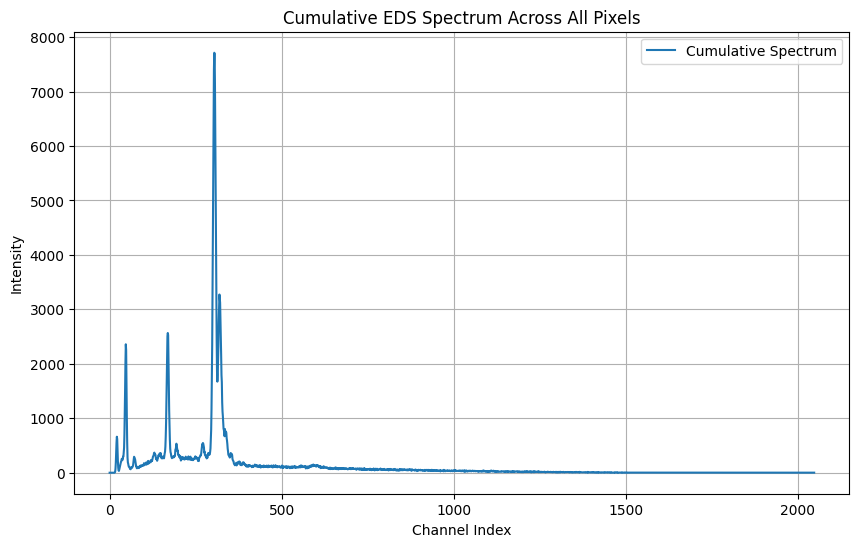

In [29]:
# Plot the cumulative spectrum
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(cumulative_spectrum, label="Cumulative Spectrum")
plt.xlabel("Channel Index")
plt.ylabel("Intensity")
plt.title("Cumulative EDS Spectrum Across All Pixels")
plt.legend()
plt.grid(True)
plt.show()